In [1]:
import os

# Set the environment variable to avoid the memory leak warning on Windows
os.environ["OMP_NUM_THREADS"] = "2"


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


# Clustering
## Live Demo

към 5та лекция

In [3]:
svm = LinearSVC()

In [4]:
sgd = SGDClassifier()

In [5]:
for chunk in pd.read_csv("../05 - Support Vector Machines/data/pulsar_star.csv", chunksize=1000):
    X, y = chunk.drop(columns = ["target_class"]), chunk["target_class"]
    print(X.shape)

    sgd.partial_fit(X, y, classes=y.unique())

(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(1000, 8)
(898, 8)


In [6]:
sgd.coef_

array([[-208.7054162 ,  182.53551447,  161.65925148,  531.80874301,
         -83.75362812,  203.72118817,  175.50789975,  -90.2587305 ]])

In [7]:
sgd

SGDClassifier()

6та лекция 

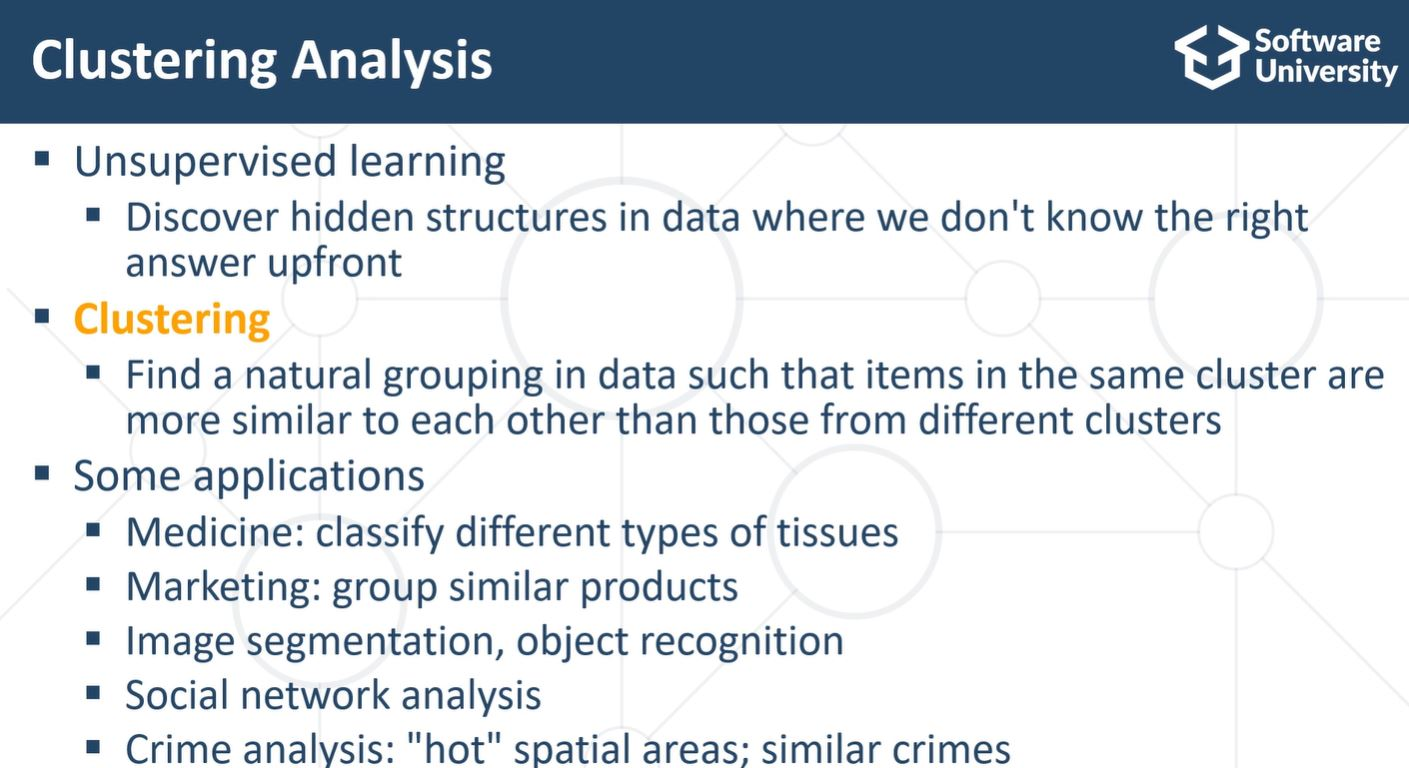

In [8]:
image_path = "images/01.JPG"
Image(filename=image_path)

In [9]:
make_blobs()

(array([[ -5.34749   ,  -8.8184701 ],
        [ -5.54836826,  -9.27490224],
        [  5.18174421,   3.03295214],
        [  4.0344397 ,   3.85732428],
        [  6.81806274,   2.49056038],
        [  3.53899854,   2.95256685],
        [ -5.95693553, -10.77560493],
        [ -4.22512512,  -9.31848372],
        [ -4.207201  ,  -9.24803762],
        [  4.70068199,   2.94729978],
        [  4.7263399 ,   2.30493381],
        [ -9.3306037 ,   2.74716239],
        [ -9.70845847,   3.5258461 ],
        [ -8.88181746,   2.33085374],
        [  4.47375406,   2.36417122],
        [ -5.0377997 , -10.42093882],
        [ -7.24662619,   1.980984  ],
        [ -9.40828391,   1.17774524],
        [ -4.79086175,  -7.81113483],
        [  5.60625397,   2.14723883],
        [ -9.97622974,   2.75552097],
        [  4.15691962,   2.78609421],
        [  4.02638002,   2.77071348],
        [  3.4787757 ,   2.87752383],
        [ -8.02401406,   2.88536423],
        [ -5.42797303,  -9.32609323],
        [ -8

In [10]:
attributes, clusters = make_blobs(n_samples=5000)

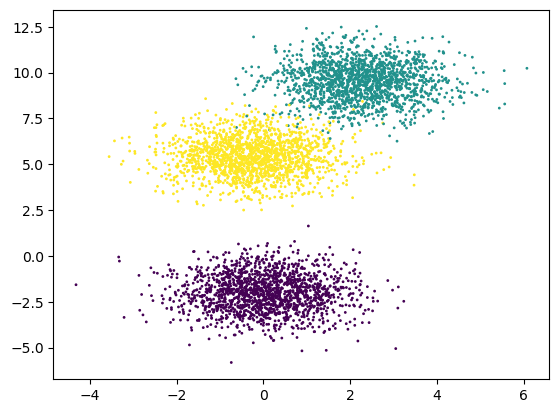

In [11]:
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters, s=1)
plt.show()

In [12]:
attributes_train, attributes_test, clusters_train, clusters_test = train_test_split(attributes, clusters)

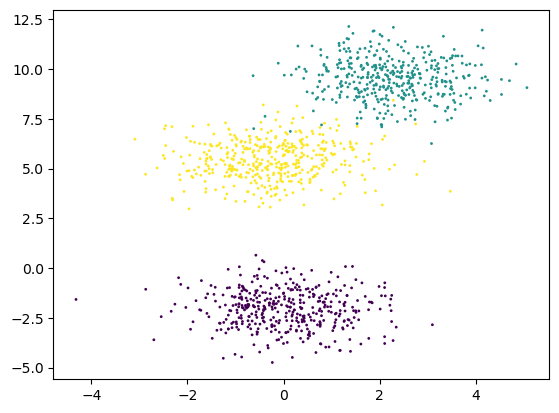

In [13]:
plt.scatter(attributes_test[:, 0], attributes_test[:, 1], c=clusters_test, s=1)
plt.show()

In [14]:
k_means = KMeans(n_clusters=3, init = "random")

In [15]:
k_means.fit(attributes_train)

C:\Users\VioletaAtanasova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [16]:
train_predictions = k_means.predict(attributes_train)

In [17]:
test_predictions = k_means.predict(attributes_test)

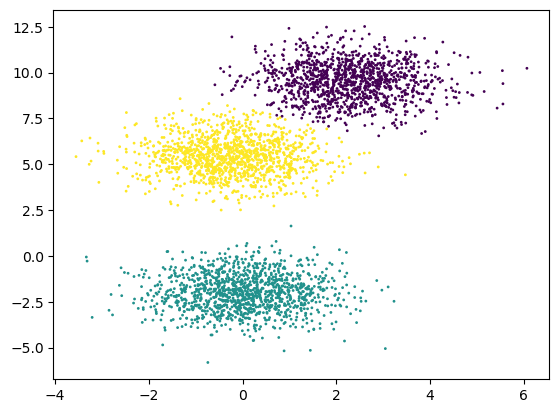

In [18]:
plt.scatter(attributes_train[:, 0], attributes_train[:, 1], c=train_predictions, s=1)
plt.show()

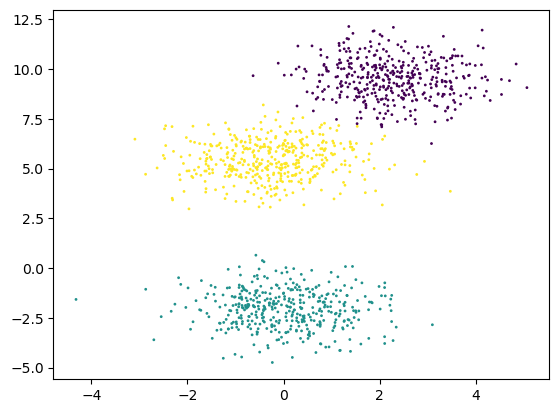

In [19]:
plt.scatter(attributes_test[:, 0], attributes_test[:, 1], c=test_predictions, s=1)
plt.show()

In [20]:
attributes, clusters = make_blobs(n_samples=500, cluster_std=3)

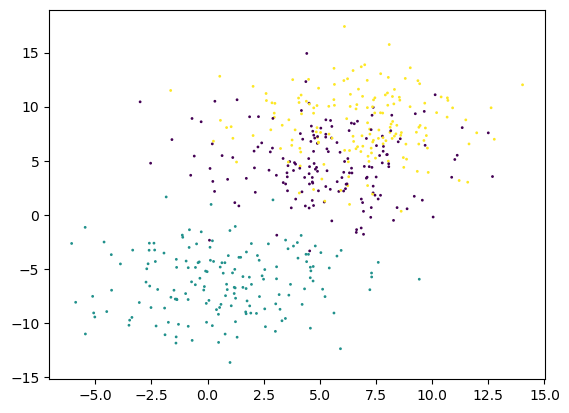

In [21]:
plt.scatter(attributes[:, 0], attributes[:, 1], c=clusters, s=1)
plt.show()

In [22]:
k_means.fit(attributes)

C:\Users\VioletaAtanasova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

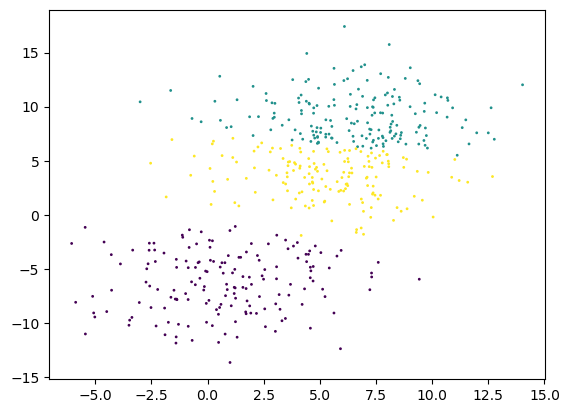

In [23]:
plt.scatter(attributes[:, 0], attributes[:, 1], c=k_means.predict(attributes), s=1)
plt.show()

In [24]:
attributes, clusters = make_blobs(n_samples=500)

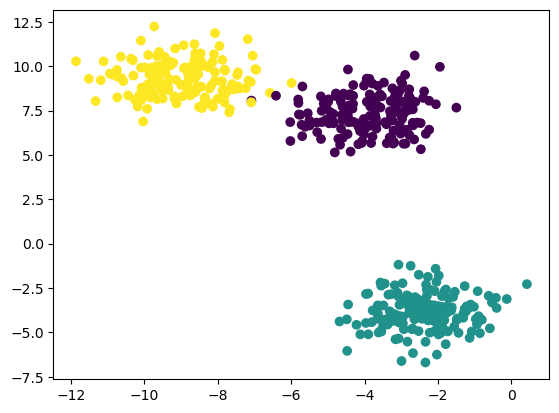

In [25]:
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()

In [26]:
k_means = KMeans(n_clusters=3, init="random")

In [27]:
k_means.fit(attributes)

C:\Users\VioletaAtanasova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

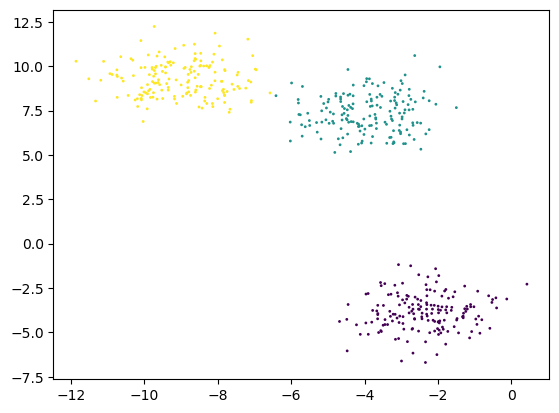

In [28]:
plt.scatter(attributes[:, 0], attributes[:, 1], c=k_means.predict(attributes), s=1)
plt.show()

In [29]:
attributes_skewed = attributes @ np.array([
    [1, 0.5], 
    [1.6, 1]
])

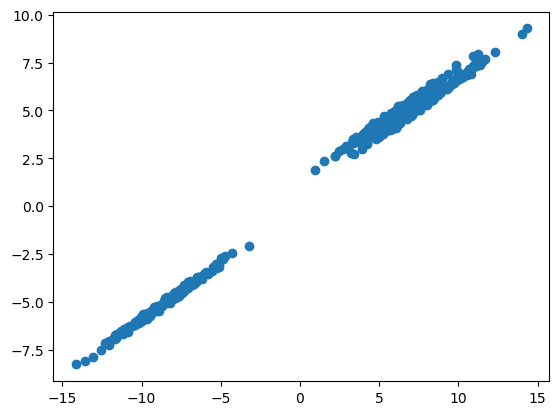

In [30]:
plt.scatter(attributes_skewed[:, 0], attributes_skewed[:, 1]) #, c=k_means.predict(attributes), s=1)
plt.show()

In [31]:
k_means.fit(attributes_skewed)

C:\Users\VioletaAtanasova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

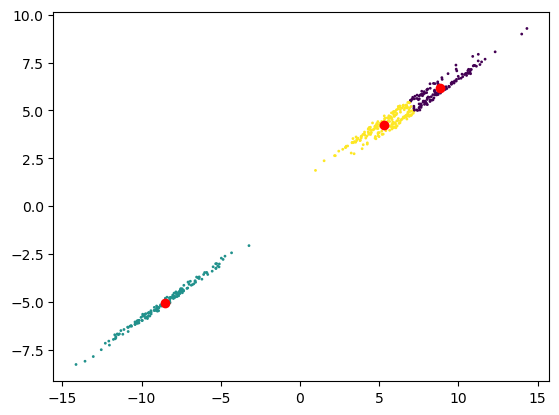

In [32]:
plt.scatter(attributes_skewed[:, 0], attributes_skewed[:, 1], c=k_means.predict(attributes_skewed), s=1)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c = "r")
plt.show()

In [33]:
k_means = KMeans(n_clusters=3, init=[[-12, -10], [-12, -9], [-20, 10]])

In [34]:
k_means.fit(attributes)

C:\Users\VioletaAtanasova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VioletaAtanasova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init=[[-12, -10], [-12, -9], [-20, 10]], n_clusters=3)

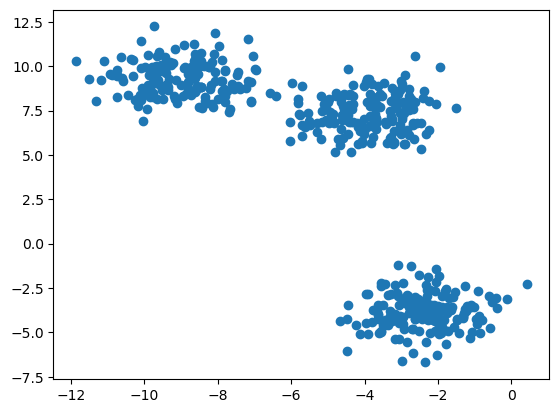

In [35]:
plt.scatter(attributes[:, 0], attributes[:, 1]) #, c=k_means.predict(attributes), s=1)
plt.show()

In [36]:
k_means.fit(attributes)

C:\Users\VioletaAtanasova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VioletaAtanasova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init=[[-12, -10], [-12, -9], [-20, 10]], n_clusters=3)

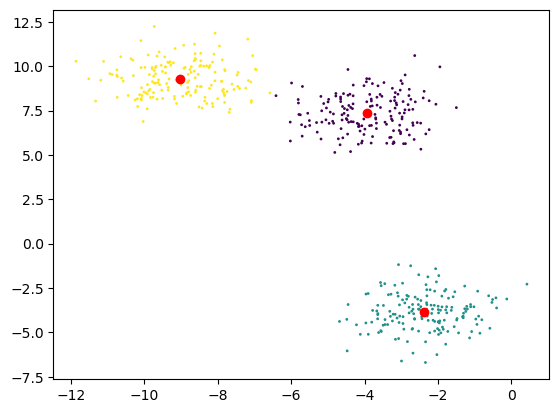

In [37]:
plt.scatter(attributes[:, 0], attributes[:, 1], c=k_means.predict(attributes), s=1)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c = "r")
plt.show()

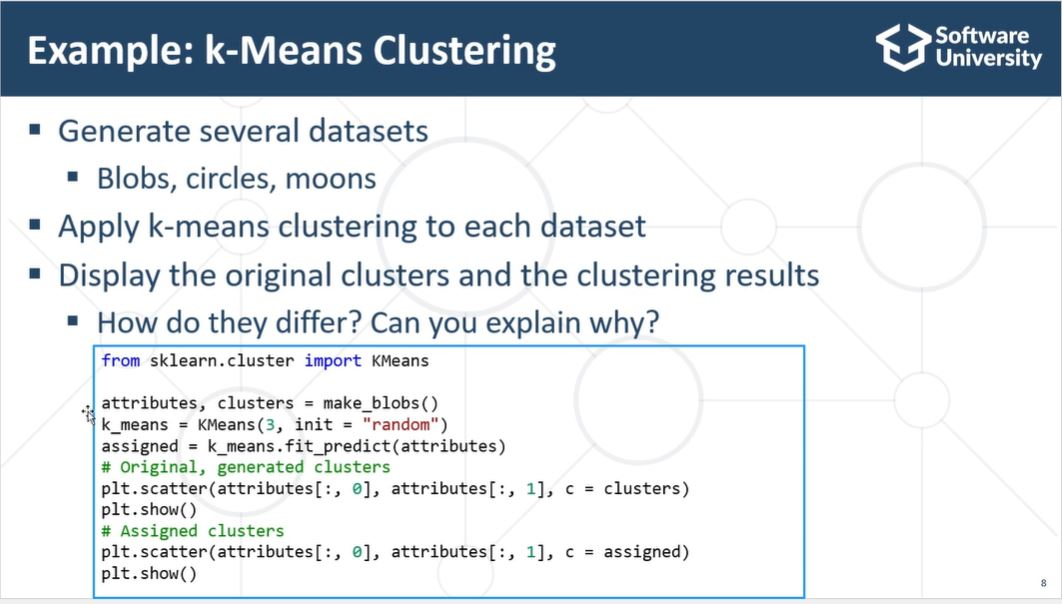

In [38]:
image_path = "images/02.JPG"
Image(filename=image_path)

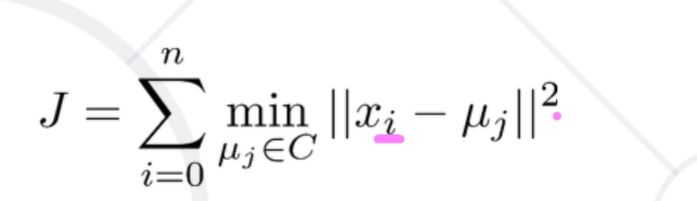

In [39]:
image_path = "images/03.JPG"
Image(filename=image_path)

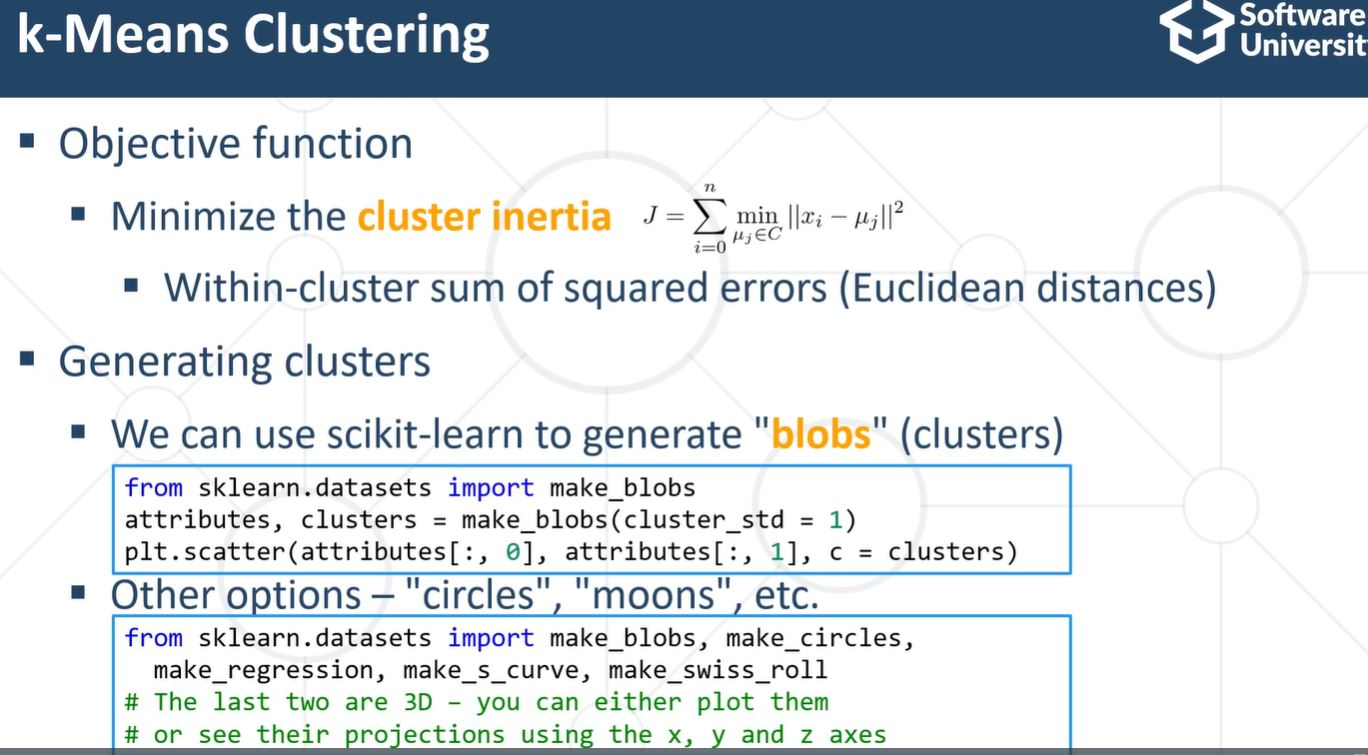

In [40]:
image_path = "images/04.JPG"
Image(filename=image_path)

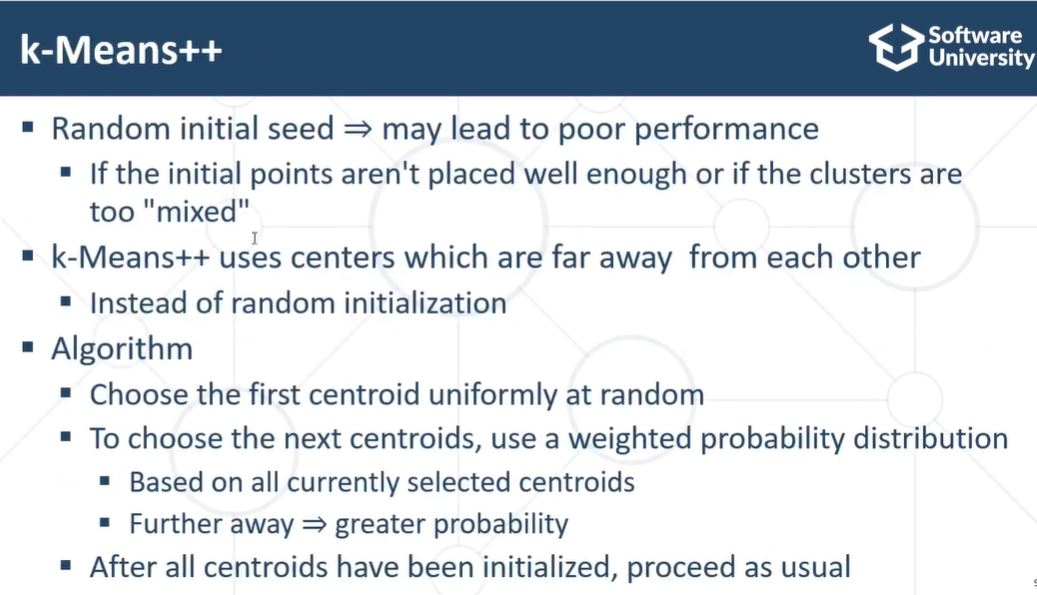

In [41]:
image_path = "images/05.JPG"
Image(filename=image_path)

In [42]:
k_means = KMeans(n_clusters=5, init = "k-means++")

In [43]:
k_means.fit(attributes_skewed)

C:\Users\VioletaAtanasova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

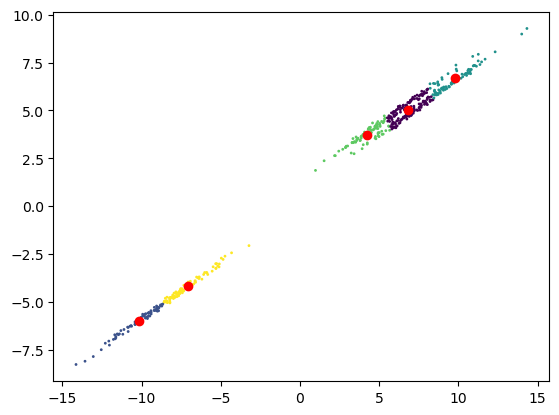

In [44]:
plt.scatter(attributes_skewed[:, 0], attributes_skewed[:, 1], c=k_means.predict(attributes_skewed), s=1)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c = "r")
plt.show()

In [45]:
k_means.inertia_ #loss function

707.6404129009894

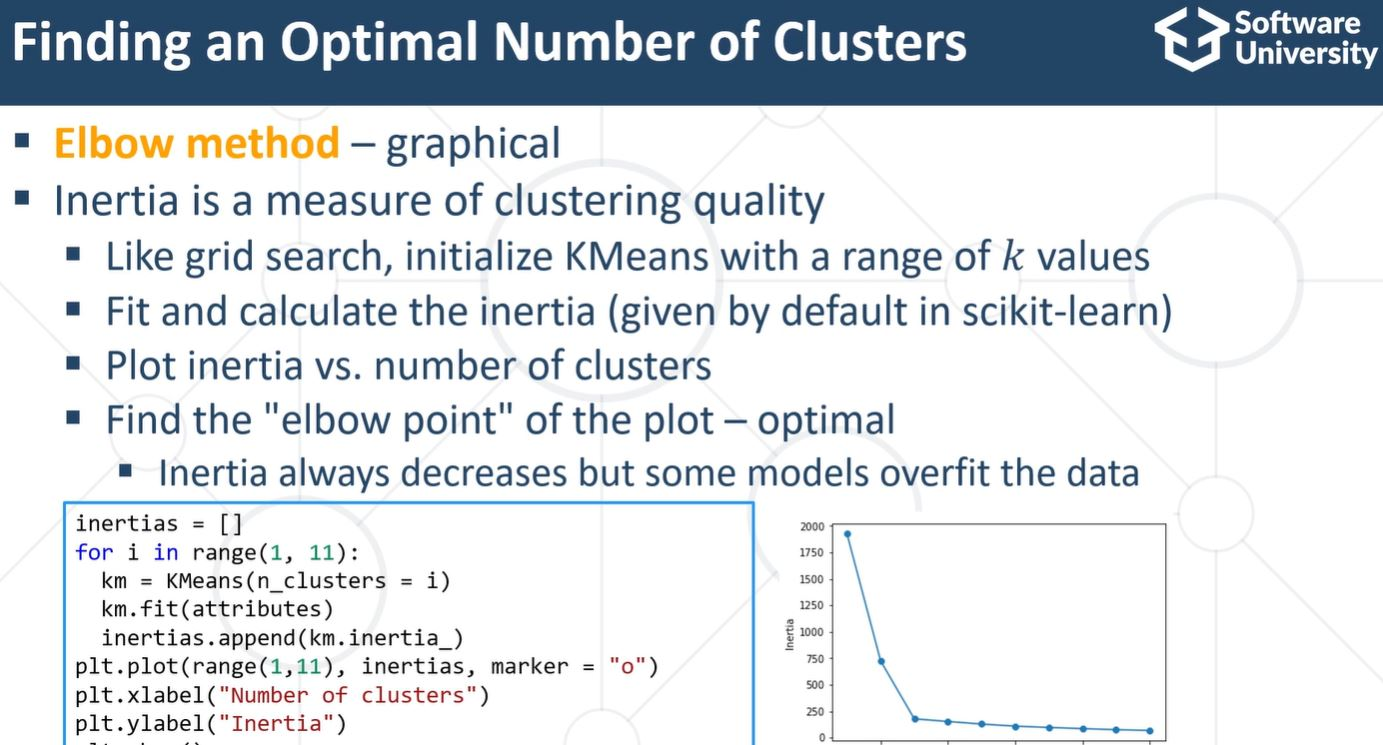

In [46]:
image_path = "images/06.JPG"
Image(filename=image_path)

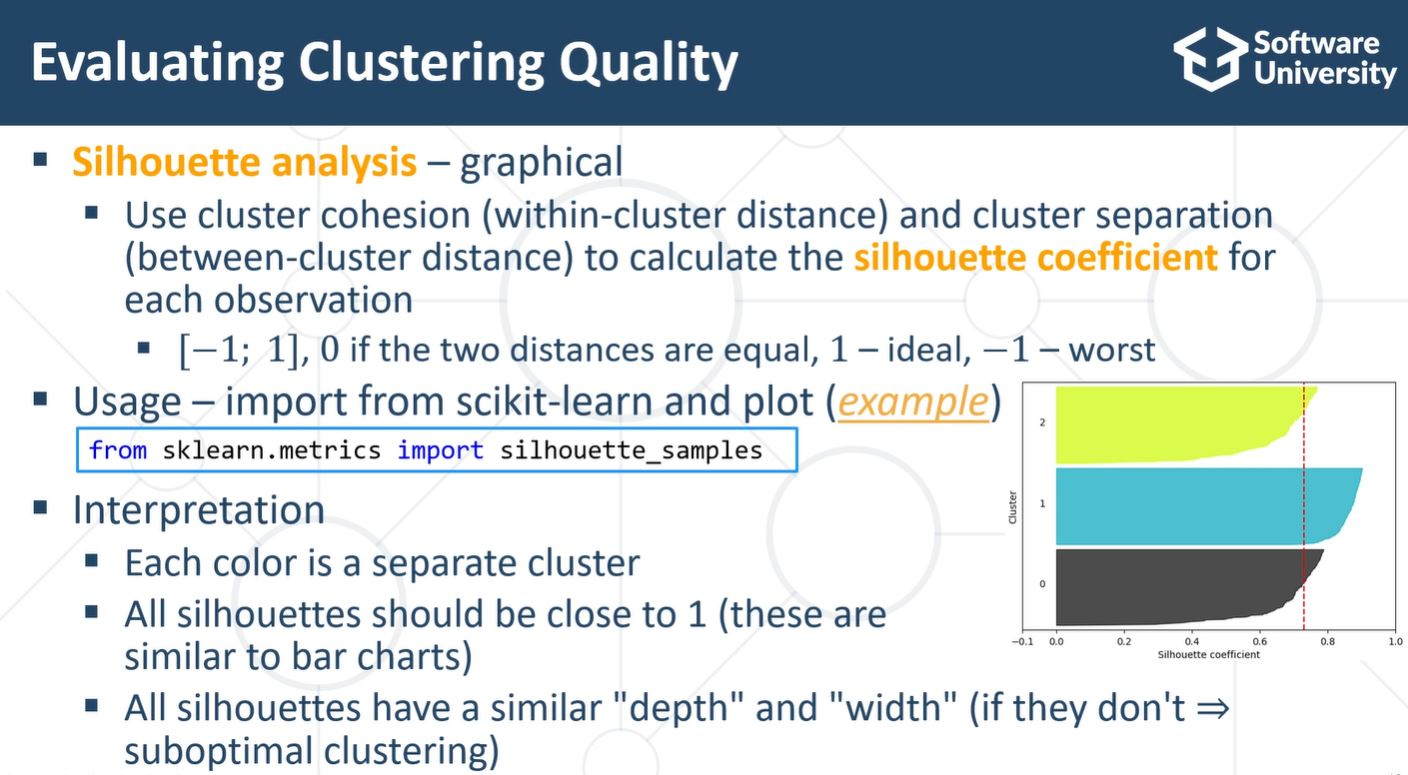

In [47]:
image_path = "images/07.JPG"
Image(filename=image_path)

In [56]:
data = {
    "n_clusters":[], 
    "inertias":[]
}
for n_clusters in range(1, 11):
    k_means = KMeans(n_clusters=n_clusters, n_init=10)  # Suppress future warning by setting n_init
    k_means.fit(attributes)
    data['n_clusters'].append(n_clusters)
    data['inertias'].append(k_means.inertia_)


In [57]:
data = pd.DataFrame(data)

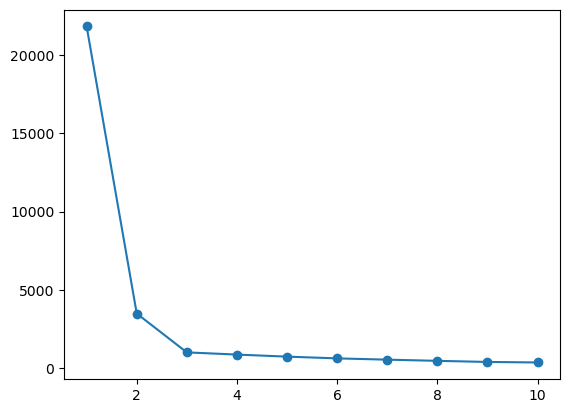

In [64]:
plt.scatter(data.n_clusters, data.inertias)
plt.plot(data.n_clusters, data.inertias)

plt.show()

In [66]:
-data.inertias.diff()

0             NaN
1    18303.882636
2     2476.110589
3      139.780300
4      131.477171
5      111.025984
6       81.222722
7       75.698801
8       70.326462
9       34.022508
Name: inertias, dtype: float64

For n_clusters = 2, the average silhouette score is: 0.3915


C:\Users\VioletaAtanasova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


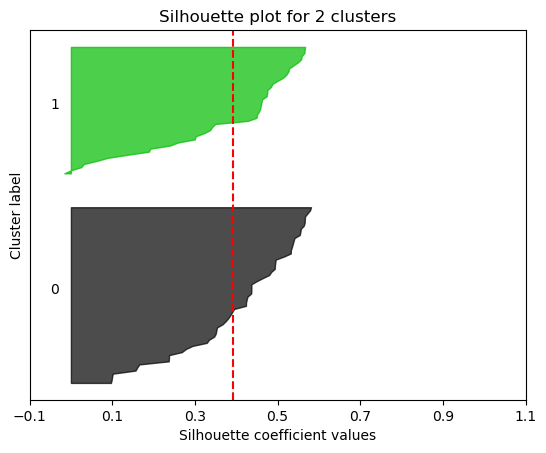

C:\Users\VioletaAtanasova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3, the average silhouette score is: 0.3845


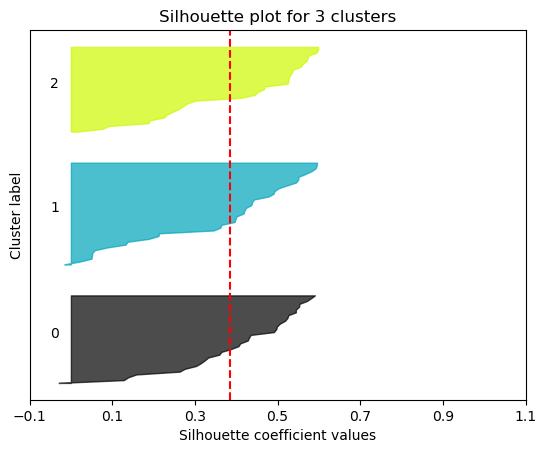

C:\Users\VioletaAtanasova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4, the average silhouette score is: 0.3954


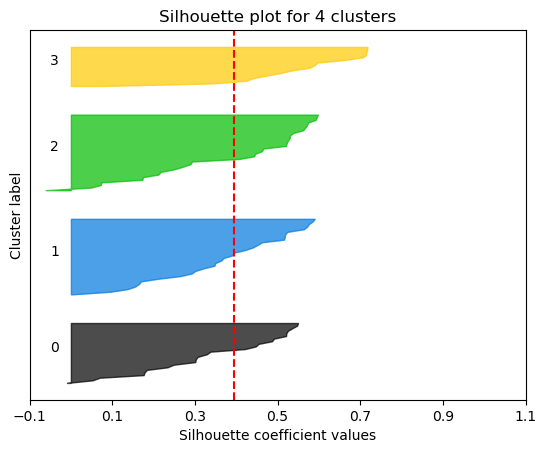

C:\Users\VioletaAtanasova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5, the average silhouette score is: 0.4120


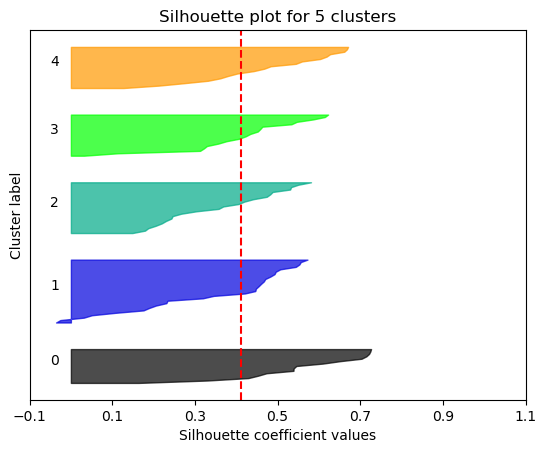

C:\Users\VioletaAtanasova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6, the average silhouette score is: 0.4228


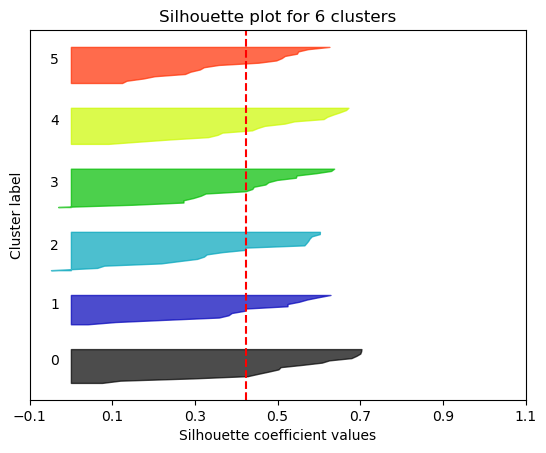

In [70]:


# Set the environment variable to avoid the memory leak warning on Windows
os.environ["OMP_NUM_THREADS"] = "1"

# Sample data (replace `attributes` with your actual data)
attributes = np.random.rand(100, 2)  # This is dummy data for illustration

# Range of clusters to evaluate
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    cluster_labels = kmeans.fit_predict(attributes)

    # Silhouette score
    silhouette_avg = silhouette_score(attributes, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.4f}")
    
    # Silhouette analysis
    sample_silhouette_values = silhouette_samples(attributes, cluster_labels)

    # Plotting the silhouette analysis
    fig, ax = plt.subplots()
    y_lower = 10  # Starting position of the silhouette plots
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Update the y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples separation

    ax.set_title(f"Silhouette plot for {n_clusters} clusters")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Clear the y-axis labels and ticks
    ax.set_yticks([])
    ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
    plt.show()


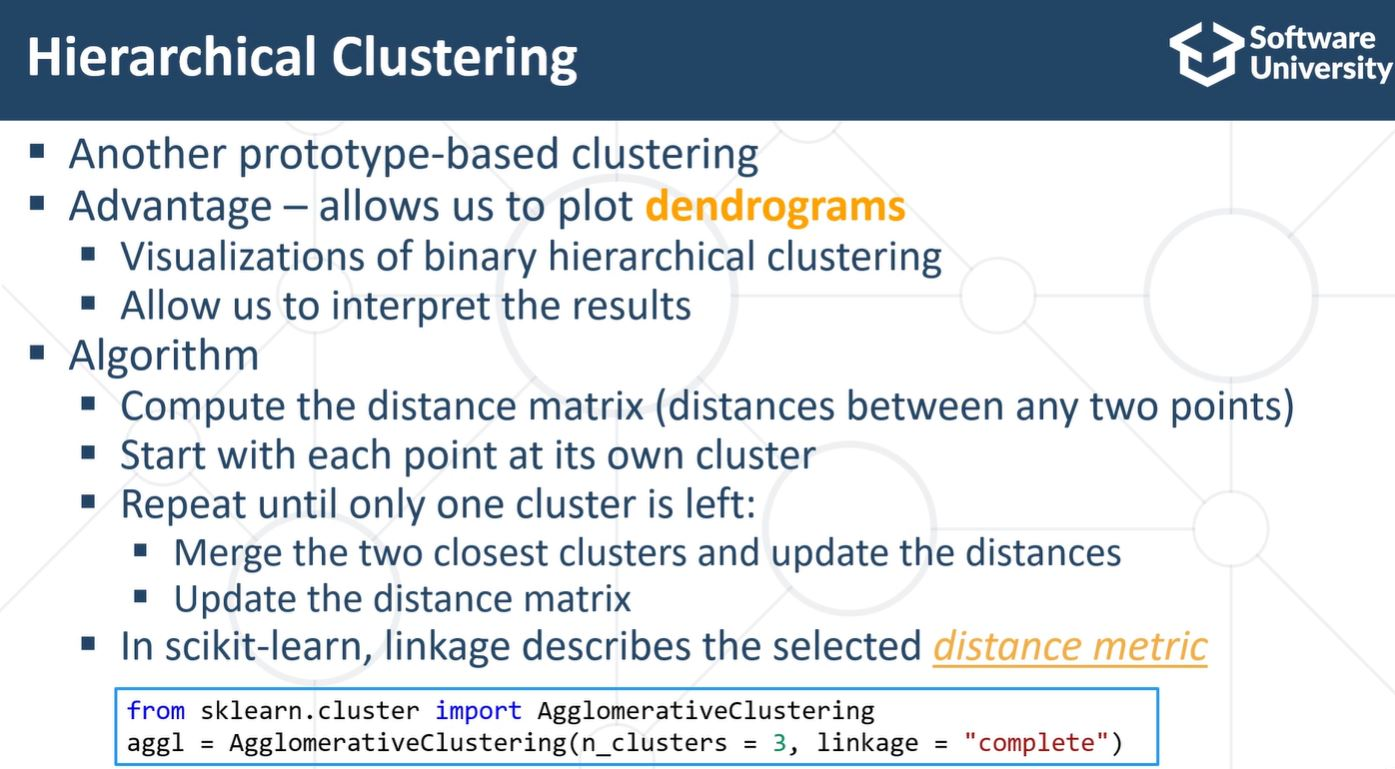

In [71]:
image_path = "images/08.JPG"
Image(filename=image_path)

In [78]:
aggl = AgglomerativeClustering(n_clusters=3)

In [79]:
aggl.fit(attributes)

AgglomerativeClustering(n_clusters=3)

In [80]:
aggl.connectivity

In [81]:
aggl.labels_

array([2, 1, 1, 1, 2, 2, 0, 0, 1, 0], dtype=int64)

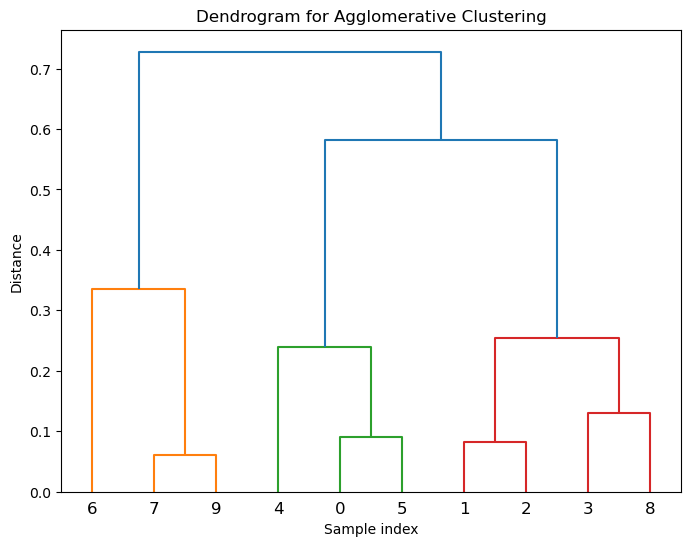

In [82]:
Z = linkage(attributes, method='complete')  

plt.figure(figsize=(8, 6))
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


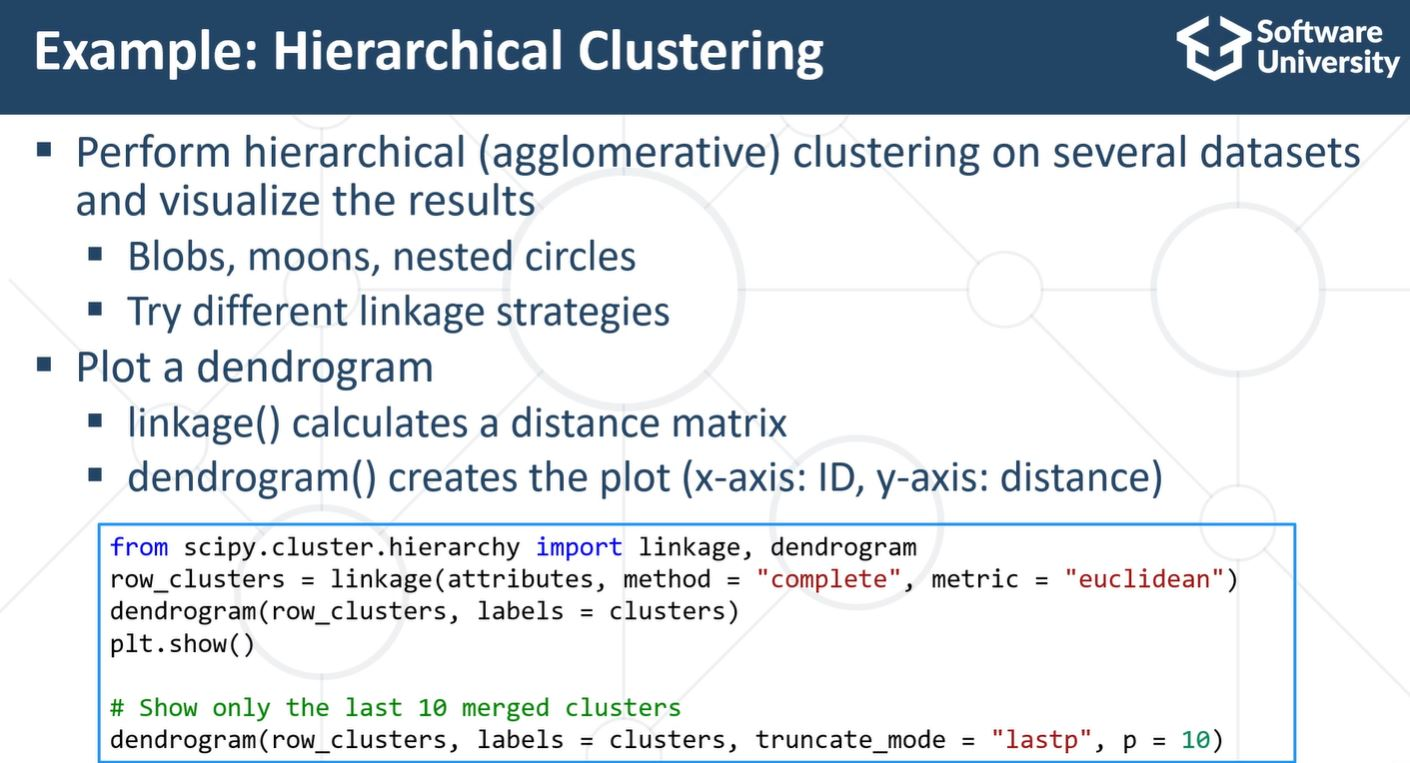

In [83]:
image_path = "images/09.JPG"
Image(filename=image_path)

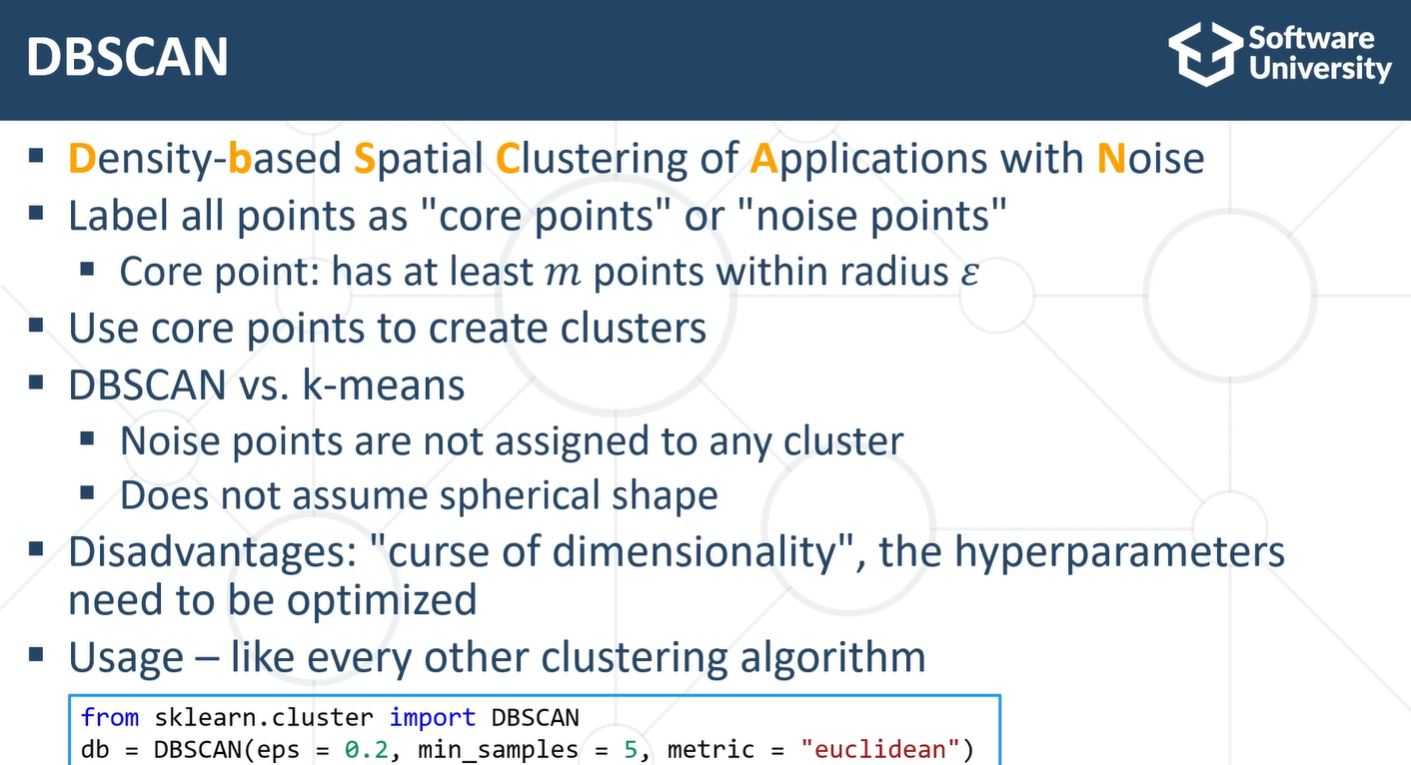

In [84]:
#Clustering with outliers

image_path = "images/10.JPG"
Image(filename=image_path)

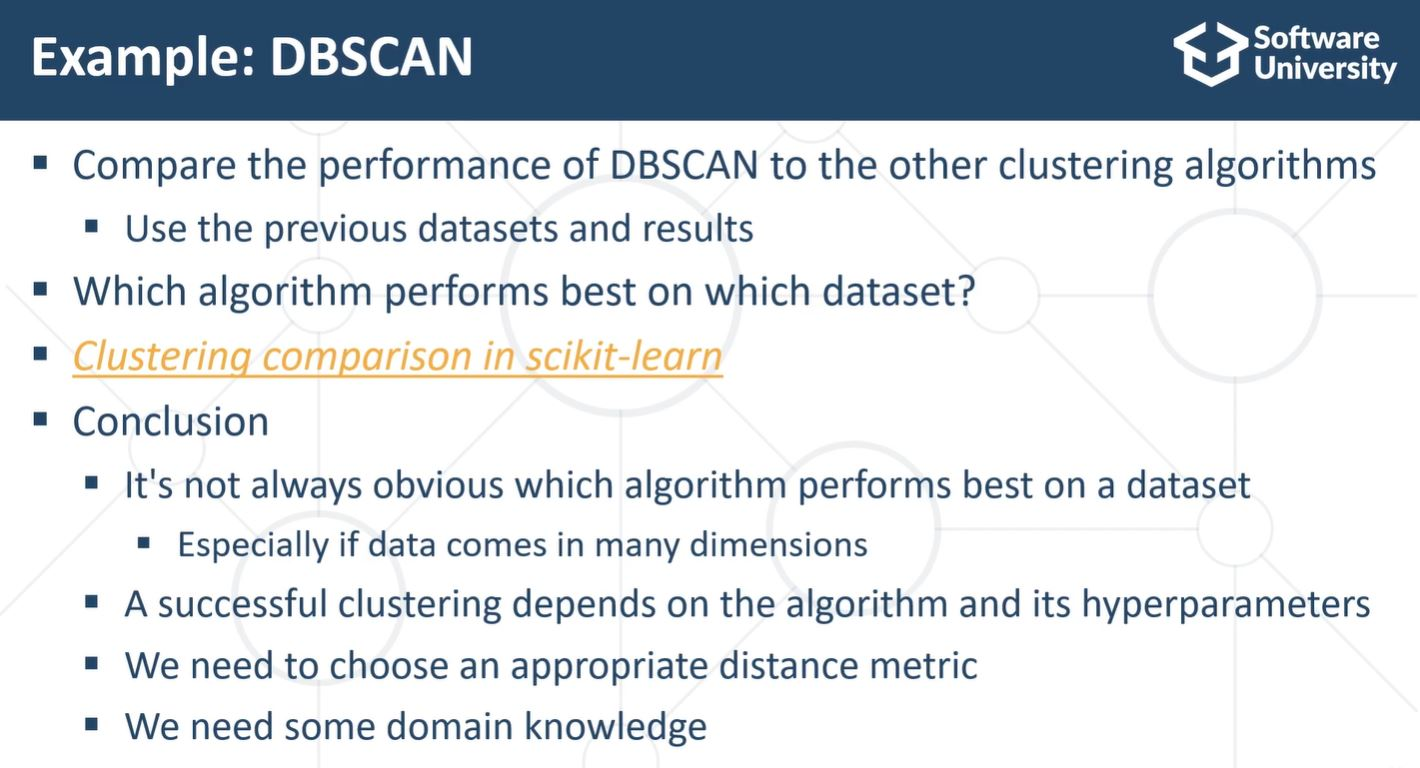

In [85]:
image_path = "images/11.JPG"
Image(filename=image_path)

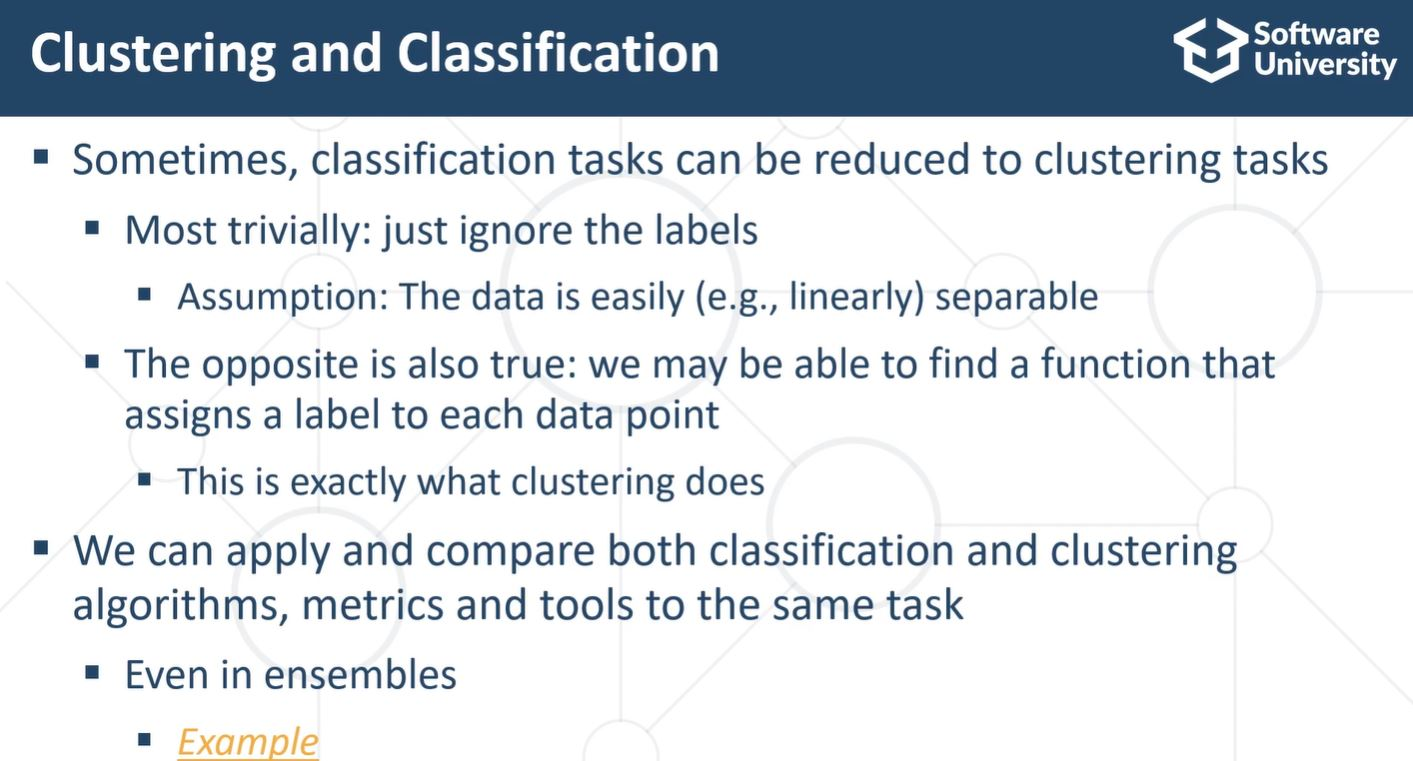

In [86]:
image_path = "images/12.JPG"
Image(filename=image_path)